# Read the Data

In [1]:
import pandas as pd


df = pd.read_csv('/content/Employee.csv')
df.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [2]:
df.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [3]:
df.shape

(4653, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [6]:
df.duplicated().sum()

1889

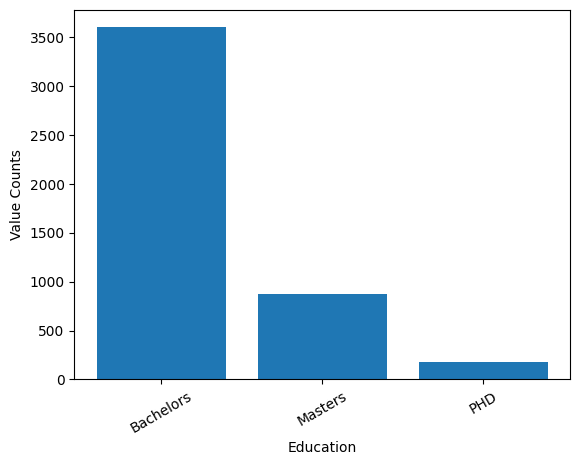

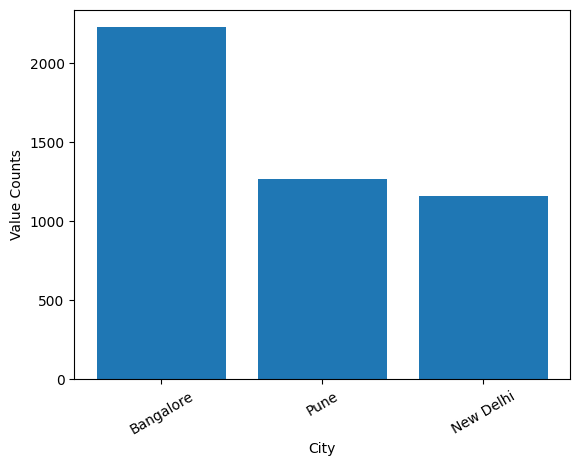

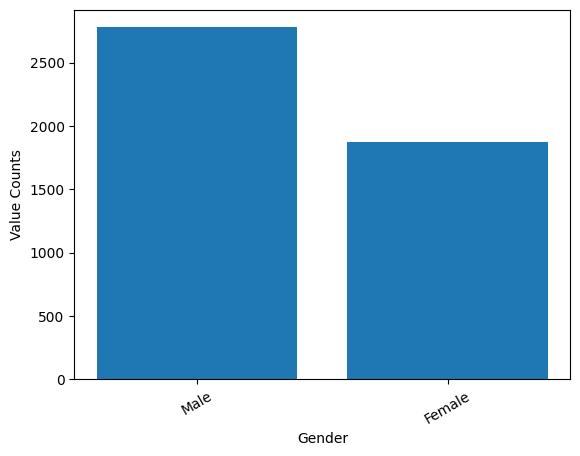

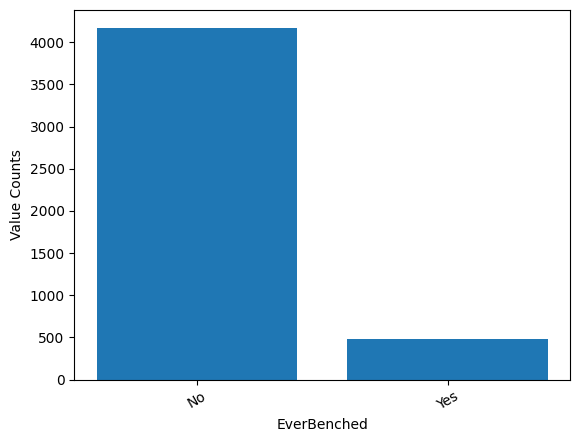

In [7]:
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['object']).columns:
  plt.bar(df[col].value_counts().index, df[col].value_counts().values)
  plt.xlabel(col)
  plt.ylabel('Value Counts')
  plt.xticks(rotation = 30)
  plt.show()

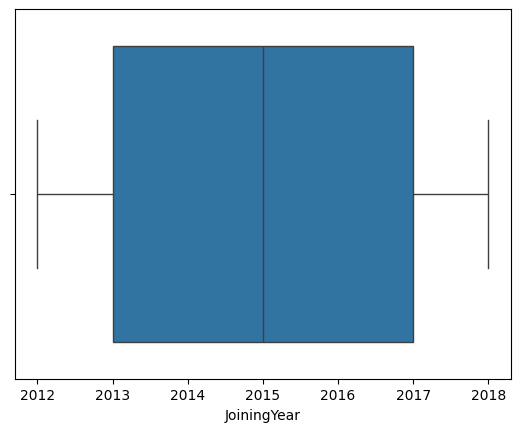

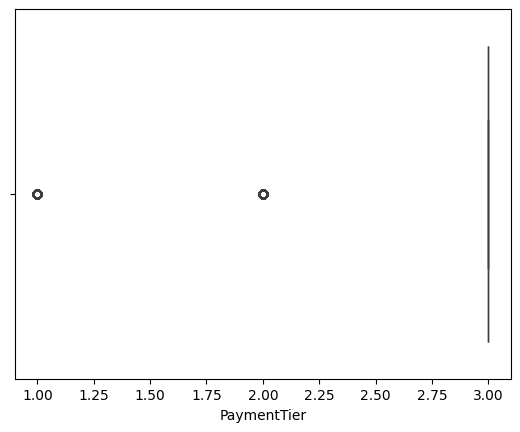

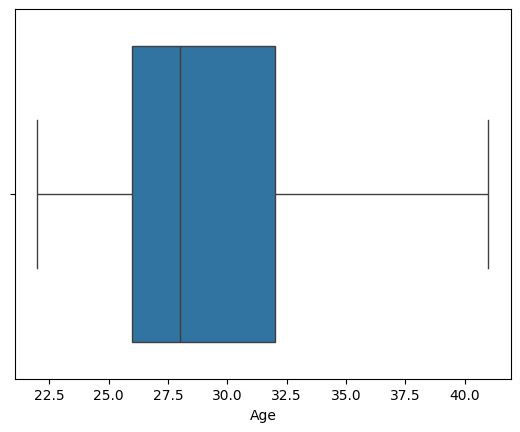

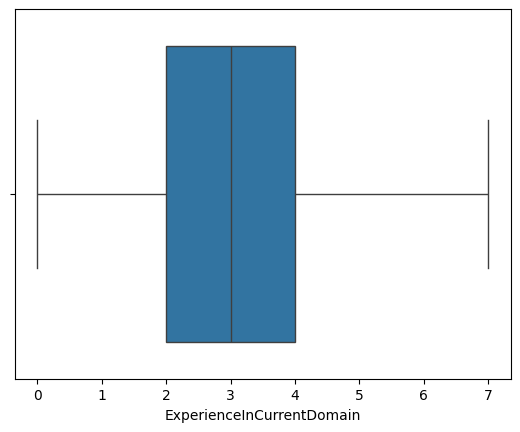

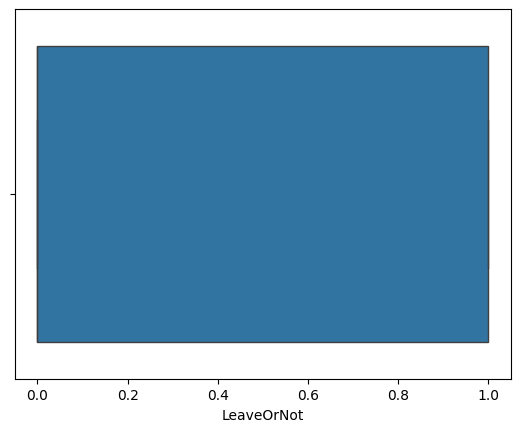

In [8]:
import seaborn as sns

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x=df[col])
    plt.show()

#Handling Outliers

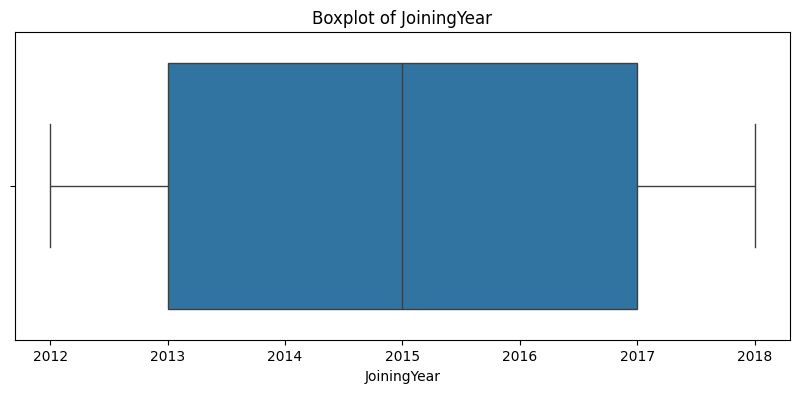

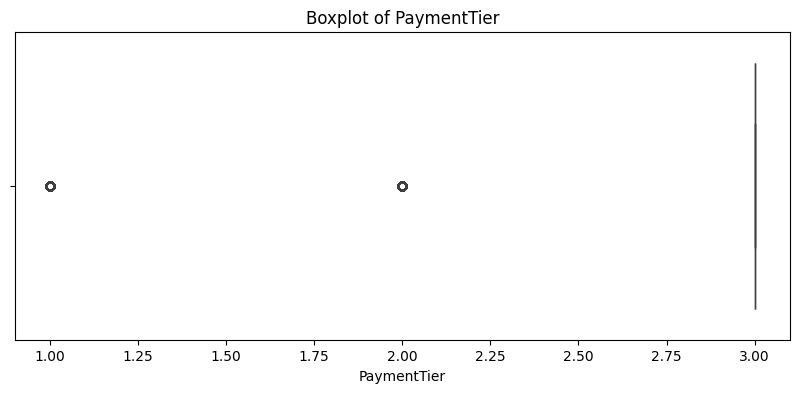

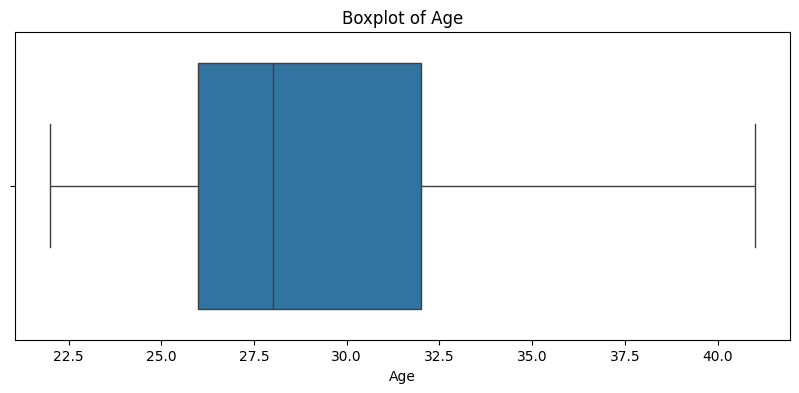

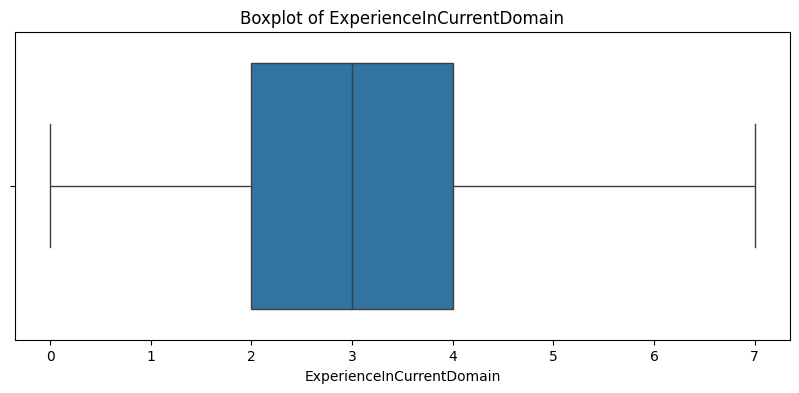

In [9]:
# Use box plots to identify outliers in numerical features
numerical_features = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

<ipython-input-10-f663b62e22d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LeaveOrNot', data=df, palette=palette)


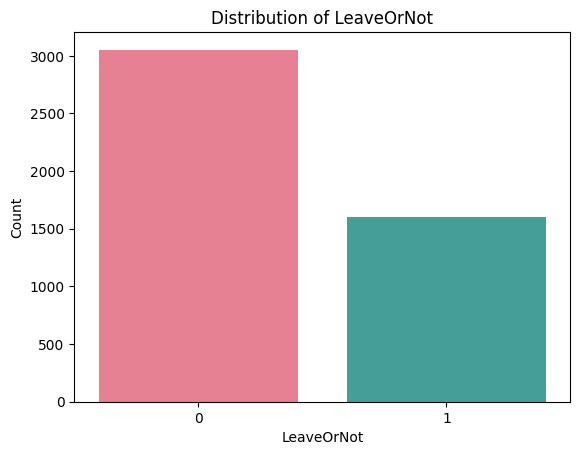

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("husl", 2)

# Visualizing the distribution of the target variable 'LeaveOrNot'
sns.countplot(x='LeaveOrNot', data=df, palette=palette)
plt.xlabel('LeaveOrNot')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot')
plt.show()




In [11]:
# Data cleaning and preprocessing

df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


Encode Categorical Variables

In [12]:
from sklearn.preprocessing import LabelEncoder
obj_cols = df.select_dtypes(object).columns
for col in obj_cols:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])

df.dtypes

,0
Education,int64
JoiningYear,int64
City,int64
PaymentTier,int64
Age,int64
Gender,int64
EverBenched,int64
ExperienceInCurrentDomain,int64
LeaveOrNot,int64


Split the Data

In [13]:
x = df.drop(columns=['LeaveOrNot'])  # Features
y = df['LeaveOrNot']  # Target variable

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

Model Selection

In [15]:
def eval_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  train_score = model.score(xtrain, ytrain)
  test_score = model.score(xtest, ytest)
  print(f'Train Score: {train_score}')
  print(f'Test Score: {test_score}')

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.716012896292316
Test Score: 0.7013963480128894


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.9301450832885545
Test Score: 0.8120300751879699


In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.8487372380440623
Test Score: 0.7787325456498388


In [19]:
from sklearn.svm import SVC
model = SVC()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.6574422353573348
Test Score: 0.6509129967776585


In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.6904889844169801
Test Score: 0.6917293233082706


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.9301450832885545
Test Score: 0.8335123523093448


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
eval_model(model, xtrain, ytrain, xtest, ytest)

Train Score: 0.8567974207415368
Test Score: 0.8506981740064447


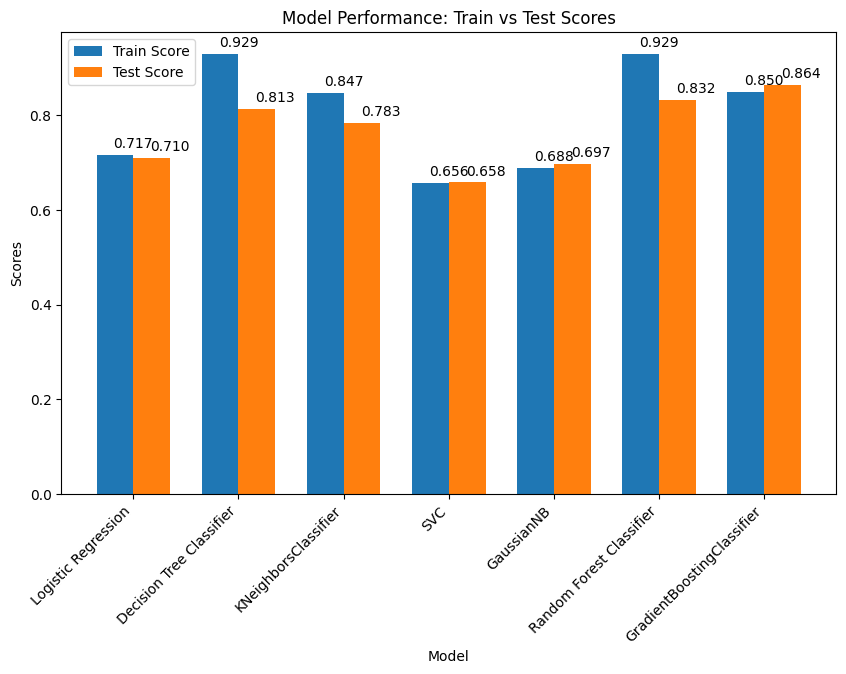

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = ['Logistic Regression', 'Decision Tree Classifier', 'KNeighborsClassifier',
          'SVC', 'GaussianNB', 'Random Forest Classifier', 'GradientBoostingClassifier']
train_scores = [0.717, 0.929, 0.847, 0.656, 0.688, 0.929, 0.850]
test_scores = [0.710, 0.813, 0.783, 0.658, 0.697, 0.832, 0.864]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Plotting the scores
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Score')

# Adding some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance: Train vs Test Scores')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 1, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

Model Training

In [23]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

Model Evaluation

In [24]:
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2447
           1       0.96      0.84      0.89      1275

    accuracy                           0.93      3722
   macro avg       0.94      0.91      0.92      3722
weighted avg       0.93      0.93      0.93      3722



In [26]:
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       606
           1       0.81      0.68      0.74       325

    accuracy                           0.83       931
   macro avg       0.83      0.80      0.81       931
weighted avg       0.83      0.83      0.83       931

